In [1]:
import sys
sys.path.append('..')
import nbimport 
nbimport.initialize()

In [2]:
from Stat_14 import *
css_styling()

# Kurve tilpasning - med fejl i den uafhængige variabel

# Curve fitting - with uncertainties in the independent variable

## Formål 

- At vise hvorledes vi kan tage højde for usikkerheder i den uafhængige variabel når vi udfører kurvetilpasning. 
- At bevise formlen for den _effektive varians_ 
- At vise hvorledes vi kan bruge det resultat i numeriske beregninger. 

## Purpose

- To show how we can take into account uncertainties in the independent variable when performing fits.
- To prove the formula for the _effective variance_
- To show how we can use that result in numerical calculations.

## En påmindelse

## A reminder

I afsnittet om kurvetilpasning ([her](#Kurvetilpasning)) kiggede vi på det tilfælde at vi havde data som 

$$\{(x_1,y_1\pm\delta_1),\ldots,(x_N,y_N\pm\delta_N)\}\quad,$$ 

hvor $x$ er den uafhængige variabel, $y$ den afhænginge, og $\delta$ usikkerheden på den afhængige variabel $y$.  Vi så hvorledes vi kan bruge _kurvetilpasning_ til at bestemme om data kan beskrives af modellen $f$.  Proceduren vi brugte var _mindste_ kvadrat, hvor vi forsøger at minimere summen af kvadratet på residualerne 

$$r_i = \frac{y_i - f(x_i;\theta)}{\delta_i}\quad,$$ 

som vi udtrykker ved $\chi^2$-målet 

$$\chi^2 = \sum_{i=1}^{N} r_i^2 = \sum_{i=1}^{N} \frac{[y_i - f(x_i;\theta)]^2}{\delta_i^2}\quad.$$ 

I det forgående afsnit så vi at forventningsværdien af $\chi^2$, givet at $f$ beskriver data og de uafhængige værdier $y_i$ er normalt fordelt omkring $f(x_i;\theta)$, er $\nu$ - antallet af frihedsgrader. 

Her vil vi bygge videre på dette.

In the section on curve fitting ([here](#Curve-fitting)) we looked at the case where we had data like

$$\{(x_1,y_1\pm\delta_1),\ldots,(x_N,y_N\pm\delta_N)\}\quad,$$

where $x$ is the independent variable, $y$ the dependent, and $\delta$ the uncertainty in the dependent variable $y$. We saw how we can use _curve fitting_ to determine whether data can be described by the model $f$. The procedure we used was _least squares_, where we try to minimize the sum of the square of the residuals

$$r_i = \frac{y_i - f(x_i;\theta)}{\delta_i}\quad,$$

as we express by the $\chi^2$ measure

$$\chi^2 = \sum_{i=1}^{N} r_i^2 = \sum_{i=1}^{N} \frac{[y_i - f(x_i;\theta)]^2}{\delta_i^2}\quad.$$

In the previous section we saw that the expectation value of $\chi^2$, given that $f$ describes data and the independent values $y_i$ is normally distributed around $f(x_i;\theta)$, is $\nu$ - the number of degrees of freedom.

Here we will build on this.

## Usikkerheder i begge variable 

Vi kan finde os selv i den situation at vores data er givet ved 

$$\{(x_i\pm\delta_{x_i},y_i\pm\delta_{y_i}|i=1,\ldots,N\}\quad,$$ 

med $x_i,y_i$ som ovenover, men hvor $\delta_{x_i}, \delta_{y_i}$ en usikkerhederne i henholdsvis den uafhængige variabel $x$ og den afhængige variabel $y$.  Hvis $\delta_{x_i}\ll \delta_{y_i}$ for alle $i$, så kan vi med rimelighed se bort fra $\delta_{x_i}$ og forsætte som tidligere.  Men hvis det ikke er tilfældet, virker det urimeligt at se bort fra usikkerheden på $x$.  Her vil vi undersøge hvad der skal til i det tilfælde.   

## Uncertainties in both variables

We can find ourselves in the situation where our data is given on the form

$$\{(x_i\pm\delta_{x_i},y_i\pm\delta_{y_i}|i=1,\ldots,N\}\quad,$$

with $x_i,y_i$ as above, but where $\delta_{x_i}, \delta_{y_i}$ is the uncertainties in the independent variable $x$ and the dependent variable $y$, respectively. If $\delta_{x_i}\ll \delta_{y_i}$ for all $i$, then we can reasonably disregard $\delta_{x_i}$ and continue as before. But if not, it seems unreasonable to ignore the uncertainty of $x$. Here we will investigate what is needed in that case.

## Udledning af _effektive varians_

Vi starter med at antage, som tidligere, at værdierne $x_i,y_i$ er normalfordelt omkring deres forventningsværdier $\mu_{x_i},\mu_{y_i}$. Det vil sige, vi antager at $X$ og $Y$ er tilfældige variable i hvert punkt $i$, og at fordelingen i hvert punkt - i begge koordinater - er en normalfordeling.  Det betyder at vi kan skrive en _sandsynlighedsfunktion_ (engl. _likelihood function_) op som produktet af sandsynligheden af _hver_ målingen givet antagelsen om normalfordeling 

$$\mathcal{L}(\theta) = \prod_{i=1}^{N} P_X(x_i)P_Y(y_i)\quad,$$

hvor

## Derivation of _effective variance_

We start by assuming, as before, that the values $x_i,y_i$ are normally distributed around their expectation values $\mu_{x_i},\mu_{y_i}$. That is, we assume that $X$ and $Y$ are random variables at each point $i$, and that the distribution at each point - in both coordinates - is a normal distribution. This means that we can write a _likelihood function_ as the product of the probability of _each_ measurement given the assumption of normal distribution.

$$\mathcal{L}(\theta) = \prod_{i=1}^{N} P_X(x_i)P_Y(y_i)\quad,$$

where

In [3]:
from sympy import symbols, IndexedBase, sqrt as sysqrt, exp as syexp, Function, S, pi as sypi, Eq
N, i = symbols('N i',positive=True,integer=True)
x    = IndexedBase('x',i)
mx   = IndexedBase('mu_x')
sigx = IndexedBase('sigma_x') 
Pxi  = 1/(sysqrt(2*sypi)*sigx[i])*syexp(-S.Half*(x[i]-mx[i])**2/sigx[i]**2)
Eq(Function('P')(x[i]),Pxi)

Eq(P(x[i]), sqrt(2)*exp(-(-mu_x[i] + x[i])**2/(2*sigma_x[i]**2))/(2*sqrt(pi)*sigma_x[i]))

er sandsynligheden for $x_i$ given forventningen $\hat x_i$, og 

is the likeliness of $x_i$ given the expectation $\hat x_i$, and

In [4]:
p    = symbols('theta')
f    = Function('f')
y    = IndexedBase('y')
my   = IndexedBase('mu_y')
sigy = IndexedBase('sigma_y') 
Pyi  = 1/(sysqrt(2*sypi)*sigy[i])*syexp(-S.Half*(y[i]-f(mx[i],p))**2/sigy[i]**2)
Eq(Function('P')(y[i]),Pyi)

Eq(P(y[i]), sqrt(2)*exp(-(-f(mu_x[i], theta) + y[i])**2/(2*sigma_y[i]**2))/(2*sqrt(pi)*sigma_y[i]))

er sandsynligheden for $y_i$ givet estimatorfunktionen $f$ og den forventet værdi $\hat x_i$.  Vi vil justerer $\theta$  sådan at $L(\theta)$ er maskimal.  Typisk vil vi bruge logaritmen til $\mathcal{L}$ og maksimerer denne.  Vi skal altså maksimerer 

$$\ell(\theta) = \log\mathcal{L}(\theta)\quad.$$

is the likeliness of $y_i$ given the estimator function $f$ and the expected value $\hat x_i$. We will adjust $\theta$ so that $L(\theta)$ is maximum. Typically, we will use the logarithm of $\mathcal{L}$ and maximize that. We have to maximize

$$\ell(\theta) = \log\mathcal{L}(\theta)\quad.$$

In [5]:
from sympy import Product, log as sylog
L  = Product(Pxi*Pyi, (i,S.One,N))
L2 = sylog(L).expand(log=True,force=True)
Eq(Function('ell')(p),L2.simplify())

Eq(ell(theta), (-log(pi) - log(2))*Sum(1, (i, 1, N)) + Sum(-f(mu_x[i], theta)**2/(2*sigma_y[i]**2) + f(mu_x[i], theta)*y[i]/sigma_y[i]**2 - log(sigma_x[i]) - log(sigma_y[i]) - mu_x[i]**2/(2*sigma_x[i]**2) + mu_x[i]*x[i]/sigma_x[i]**2 - y[i]**2/(2*sigma_y[i]**2) - x[i]**2/(2*sigma_x[i]**2), (i, 1, N)))

Udtrykket set skræmmende ud ved første øjenkast, men hvis vi definerer 

The expression looked scary at first glance, but if we define

In [6]:
from sympy import Sum, Symbol
Sp = Sum((x[i]-mx[i])**2/sigx[i]**2 +(y[i]-f(mx[i],p))**2/sigy[i]**2 ,(i,S.One,N))
Eq(Symbol('S'),Sp)

Eq(S, Sum((-f(mu_x[i], theta) + y[i])**2/sigma_y[i]**2 + (-mu_x[i] + x[i])**2/sigma_x[i]**2, (i, 1, N)))

ser vi at 

$$\ell(p) = -\frac{1}{2}S + C\quad,$$

med 

$$ C = -\sum_{i=1}^{N}\log\left(\sqrt{2\pi}\sigma_{x_i}\right)+\log\left(\sqrt{2\pi}\sigma_{y_i}\right)\quad,$$

hvilket vi kan tjekke

we see that

$$\ell(p) = -\frac{1}{2}S + C\quad,$$

with

$$ C = -\sum_{i=1}^{N}\log\left(\sqrt{2\pi}\sigma_{x_i}\right)+\log\left(\sqrt{2\pi}\sigma_{y_i}\right)\quad,$$

which we can check

In [7]:
C = Sum(sylog(sysqrt(2*sypi)*sigx[i]) 
        + sylog(sysqrt(2*sypi)*sigy[i]), (i,S.One,N))
(L2+Sp/2+C).simplify()

0

Vi vil maksimerer $\mathcal{L}(\theta)$ med hensyn til $\mu_{x_i}$, svarende til at _minimerer_ $S$.  Vi beregner $\frac{\partial S}{\partial \mu_{x_i}}$. 

We want to maximize $\mathcal{L}(\theta)$ with respect to $\mu_{x_i}$, which is the same as to _minimizing_ $S$. We calculate $\frac{\partial S}{\partial \mu_{x_i}}$.

In [8]:
from sympy import Derivative

dS = Sp.diff(mx[i])
Eq(Derivative(Symbol('S'),mx[i]),dS)

Eq(Derivative(S, mu_x[i]), Sum(-2*(-f(mu_x[i], theta) + y[i])*Derivative(f(mu_x[i], theta), mu_x[i])/sigma_y[i]**2 + (2*mu_x[i] - 2*x[i])/sigma_x[i]**2, (i, 1, N)))

Da vi ikke kender $\theta$, Taylor udvikler vi funktionen $f(x,\theta)$ omkring $\mu_{x_i}$ op til orden $n=1$ (to led)

Since we do not know $\theta$, we Taylor expand the function $f(x,\theta)$ around $\mu_{x_i}$ up to order $n=1$ (two terms)

In [9]:
from sympy import series
T = series(f(x[i],p),x[i],mx[i],n=2)
Eq(f(x[i],p),T)

Eq(f(x[i], theta), f(mu_x[i], theta) + (-mu_x[i] + x[i])*Subs(Derivative(f(_xi_1, theta), _xi_1), _xi_1, mu_x[i]) + O((-mu_x[i] + x[i])**2, (x[i], mu_x[i])))

og vi finder 

and we find

In [10]:
T2 = f(x[i],p)-T.removeO().args[0].factor()
Eq(T.removeO().args[1],T2.doit())

Eq(f(mu_x[i], theta), (mu_x[i] - x[i])*Derivative(f(mu_x[i], theta), mu_x[i]) + f(x[i], theta))

Bemærk at vi dropper (`removeO`) de højere ordensled eksplicit, hvilket er OK hvis $|x_i - \mu_{x_i}|$ ikke er for stor.  Vi indsætter udtrykket for $f(\mu_{x_i},\theta)$ ovenover i det indre af summen $S_i$.  Vi skal dog tage vare på _ikke_ at erstatte $\partial f(\mu_{x_i},\theta)/\partial\mu_{x_i}$ med differentialet af Taylor serien, så vi definerer

Note that we drop (`removeO`) the higher order terms explicitly, which is OK if $|x_i - \mu_{x_i}|$ is not too big. We insert the term for $f(\mu_{x_i},\theta)$ above into the interior $S_i$ of the sum $S$.  We have to be careful, though, not to replace $\partial f(\mu_{x_i},\theta)/\partial\mu_{x_i}$ with the differential of the Tayler expression above, so we define 

In [11]:
D = symbols('D',real=True)
Eq(D,Derivative(f(mx[i],p),mx[i]))

Eq(D, Derivative(f(mu_x[i], theta), mu_x[i]))

og indsætter det i det indre af $S_i$

and inserts it into the interior of $S_i$

In [12]:
dS1 = dS.args[0].subs(Derivative(f(mx[i],p),mx[i]),D)
Eq(Derivative(Symbol('S_1'),mx[i]),dS1)

Eq(Derivative(S_1, mu_x[i]), -2*D*(-f(mu_x[i], theta) + y[i])/sigma_y[i]**2 + (2*mu_x[i] - 2*x[i])/sigma_x[i]**2)

og i Taylor udtrykket 

and in the Taylor expression

In [13]:
T3  = T2.doit().subs(Derivative(f(mx[i],p),mx[i]),D)
Eq(f(mx[i],p),T3)

Eq(f(mu_x[i], theta), D*(mu_x[i] - x[i]) + f(x[i], theta))

som vi så indsætter ovenover og sætter lig nul

which we then insert above and set equal to zero

In [14]:
from sympy import UnevaluatedExpr

dS2 = dS1.subs(f(mx[i],p),T3)
Eq(UnevaluatedExpr(Eq(Derivative(Symbol('S_1'),mx[i]),dS2)),0)

Eq(Eq(Derivative(S_1, mu_x[i]), -2*D*(-D*(mu_x[i] - x[i]) - f(x[i], theta) + y[i])/sigma_y[i]**2 + (2*mu_x[i] - 2*x[i])/sigma_x[i]**2), 0)

Vi løser denne ligning for $\mu_{x_i}$ og finder 

We solve this equation for $\mu_{x_i}$ and find 

In [15]:
from sympy import solve

s3 = solve(dS2,mx[i])[0].collect(x[i]).ratsimp().collect(D*sigx[i]**2)
Eq(mx[i],s3)

Eq(mu_x[i], D*(-f(x[i], theta) + y[i])*sigma_x[i]**2/(D**2*sigma_x[i]**2 + sigma_y[i]**2) + x[i])

Vi sætter $\delta$ til at være nævneren i dette udtryk

We put $\delta$ to be the denominator in this expression

In [16]:
d2 = 1/s3.doit().args[0].args[2]
d  = IndexedBase('delta')
Eq(d[i]**2,d2)

Eq(delta[i]**2, sigma_x[i]**(-2))

Vi erstatter $\delta$ ind i vores løsning for $\mu_{x_i}$

We replace $\delta$ into our solution for $\mu_{x_i}$

In [17]:
s4 = s3.subs({d2:d[i]**2})
Eq(mx[i],s4)

Eq(mu_x[i], D*(-f(x[i], theta) + y[i])/((D**2/delta[i]**2 + sigma_y[i]**2)*delta[i]**2) + x[i])

Vi kan nu omskrive det indre udtryk $S_i$ i summen $S$ i termer af vores Taylor udvikling (`T3`) og vores løsning for $\mu_{x_i}$ (`s4`). 

We can now rewrite the inner expression $S_i$ in the sum $S$ in terms of our Taylor expansion (`T3`) and our solution for $\mu_{x_i}$ (` s4`).

In [18]:
S3 = Sp.args[0].subs({f(mx[i],p):T3,mx[i]:s4})
Eq(Symbol('S_i'),S3)

Eq(S_i, D**2*(-f(x[i], theta) + y[i])**2/((D**2/delta[i]**2 + sigma_y[i]**2)**2*delta[i]**4*sigma_x[i]**2) + (-D**2*(-f(x[i], theta) + y[i])/((D**2/delta[i]**2 + sigma_y[i]**2)*delta[i]**2) - f(x[i], theta) + y[i])**2/sigma_y[i]**2)

Lad os reducere dette. Først indsætter vi definitionen af $\delta$ igen, faktorer, og indsætter $\delta$ tilbage. Vi får 

Let's reduce this. First, we re-insert the definition of $\delta$, factorise, and insert $\delta$ back. We get

In [19]:
S4 = S3.subs(d[i]**2,d2).factor().subs(d2,d[i]**2)
Eq(Symbol('S_i'),S4)

Eq(S_i, (f(x[i], theta) - y[i])**2/(D**2/delta[i]**2 + sigma_y[i]**2))

Hvilket betyder at 

Which means that

In [20]:
Eq(Symbol('S'),Sum(S4,(i,S.One,N)))

Eq(S, Sum((f(x[i], theta) - y[i])**2/(D**2/delta[i]**2 + sigma_y[i]**2), (i, 1, N)))

og vi kan _maksimerer_ sandsynligheden $\mathcal{L}(\theta)$ ved at _minimerer_ $S$.  Vi genkender med det samme at vi har genskabt det almindelige $\chi^2$, hvor vi dog har lavet erstatningen 

$$\delta_{y_i}^2 \rightarrow \delta_i^2 = \left(\frac{\partial f(x,\theta)}{\partial x}\right)^2\delta_{x_i}^2 + \delta_{y_i}^2\quad,$$ 

som vi kalder den _effektive varians_, og vi bemærker at 

$$\delta_i^2 \ge \delta_{y_i}^2\quad.$$ 

and we can _maximize_ the_likeliness of $\mathcal{L}(\theta)$ by _minimizing_ $S$. We immediately recognize that we have recreated the regular $\chi^2$, however with the replacement

$$\delta_{y_i}^2 \rightarrow \delta_i^2 = \left(\frac{\partial f(x,\theta)}{\partial x}\right)^2\delta_{x_i}^2 + \delta_{y_i}^2\quad,$$

which we call the _effective variance_ and we notice that

$$\delta_i^2 \ge \delta_{y_i}^2\quad.$$

Formlen for $\delta^2$ ovenover giver intuitivt mening: Vi propagerer usikkerheden på $x_i$ til $y_i$ ved hjælp af den afledte af funktionen $f$, evalueret i punktet $x_i$.

I udledningen oven over har vi gjort en række antagelser 

1. Punkterne $x_i,y_i$ er normalfordelt omkring forventningsværdierne $\mu_{x_i},\mu_{y_i}$.
2. Vi kan estimerer spredningerne $\sigma_{x_i},\sigma_{y_i}$ af punkterne ved hjælp af usikkerhederne $\delta_{x_i},\delta_{y_i}$. 
3. I Taylor udviklingen af $f(x_i,\theta)$ antog vi at $|x_i-\mu_{x_i}|$ er lille. 

Der er ikke som sådan noget odiøst ved disse antagelser, og de kan forholdvis nemt bekræftiges i langt de fleste tilfælde.  Faktisk er antagelse 1 og 2 de samme vi gør med det almindelige $\chi^2$, og antagelse 3 ændre ikke væsentligt på forudsætningerne. 

Endelig kan vi overbevise os selv at vi har det samme antal frihedsgrader.  Hvis vi har $N$ punkter og $M$ parametre, så er antallet af frihedsgrader 

$$\nu = 2N - (M+N) = N - M\quad,$$ 

ganske som normalt.  Det første led $2N$ kommer af at vi betragter både $y_i$ og $x_i$ som frihedsgrader, men at vi bruger $N$ $\delta_{x_i}$, hvorfor vi må fjerne dem igen. 

Det betyder også, at alle de resultater vi kender vedrørende $\chi^2$ holder.  Specielt kan vi estimerer sandsynligheden af en given kurvetilpasning på nøjagtig samme vis som ellers. 

The formula for $\delta^2$ above makes intuitive sense: We propagate the uncertainty of $x_i$ to $y_i$ using the derivative of the function $f$, evaluated at $x_i$.

In the above proof we have made a number of assumptions

1. The points $x_i,y_i$ are normally distributed around the expectation values $\mu_{x_i},\mu_{y_i}$.
2. We can estimate the spreads $\sigma_{x_i},\sigma_{y_i}$ of the points using the uncertainties $\delta_{x_i},\delta_{y_i}$.
3. In the Taylor expansion of $f(x_i,\theta)$, we assumed that $|x_i-\mu_{x_i}|$ is small.

As such, there is nothing odious about these assumptions, and they can be fairly easily confirmed in the vast majority of cases. In fact, assumptions 1 and 2 are the same as we do with ordinary $\chi^2$, and assumption 3 does not significantly change the assumptions.

Finally, we can convince ourselves that we have the same number of degrees of freedom. If we have $N$ points and $M$ parameters, then the number of degrees of freedom

$$\nu = 2N - (M+N) = N - M\quad,$$

quite as usual. The first part of $2N$ comes from the fact that we consider both $y_i$ and $x_i$ as degrees of freedom, but that we use $N$ $\delta_{x_i}$, which is why we have to remove them again.

It also means that all the results we know about $\chi^2$ hold. Specifically, we can estimate the probability of a given curve fitting in exactly the same way as before.

I dette afsnit har vi bevist at i det tilfælde at vi har data 

$$\{(x_i\pm\delta_{x_i},y_i\pm\delta_{y_i})|i=1,\ldots,N\}\quad,$$ 

kan vi bruge den almindelige mindste kvadrat metode til kurvetilpasning når blot vi propagerer usikkerheden på $x_i$ til $y_i$ ved hjælp af den _effektive varians_ 

$$\delta_i^2 = \left(\frac{\partial f(x_i;\theta)}{\partial x}\right)^2\delta_{x_i}^2+\delta_{y_i}^2\quad,$$

og beregner residualerne 

$$r_i = \frac{y_i - f(x_i;\theta)}{\delta_i}\quad.$$

I næste afsnit vil vi se hvorledes vi kan bruge dette _numerisk_. 

In this section we have proven that in the event that we have data

$$\{(x_i\pm\delta_{x_i},y_i\pm\delta_{y_i})|i=1,\ldots,N\}\quad,$$

we can use the ordinary least squares method for curve fitting if we propagate the uncertainty on $x_i$ to $y_i$ using the _effective variance_

$$\delta_i^2 = \left(\frac{\partial f(x_i;\theta)}{\partial x}\right)^2\delta_{x_i}^2+\delta_{y_i}^2\quad,$$

and calculate the residuals

$$r_i = \frac{y_i - f(x_i;\theta)}{\delta_i}\quad.$$

In the next section we will see how we can use this _numerically_.

## Numeriske beregninger 

Ovenover kom vi frem til det intuitive resultat at hvis vi har usikkerheder på den _uafhængige_ variabel ($x$), så kan vi tage højde for dem ved at propagerer de usikkerheder til den _afhængige_ variabel ($y$).   Resultatet er så intuitivt klart at vi kan blive forledt til at tro at vores standard numeriske koder nemt kan tilpasses til at udfører kurvetilpasning med disse betingelser.   Det er desværre ikke helt tilfældet.  

For at se det, tager vi endnu et blik på formlen for den effektive varians 

$$\delta_i^2 = \left(\frac{\partial f(x_i;\theta)}{\partial x}\right)^2\delta_{x_i}^2+\delta_{y_i}^2\quad.$$

På overfladen ser alt ud til at være ganske ligetil, men der gemmer sig en fælde i den første faktor i det første led 

$$\frac{\partial f(x_i;\theta)}{\partial x}\quad.$$

Når standard algoritmer forsøger at finde $p$ så at $\chi^2$ er mindst muligt, antager disse algoritmer oftest at usikkerheden på målepunkterne er _konstant_.  Normalt er det også tilfældet, men i vores tilfælde afhænger usikkerhederne $\delta_i$ af den afledte af $f$, som igen afhænger af værdierne af $p$, og derfor holder denne antagelse ikke - usikkerhederne afhænger i sig selv af de parametre værdier som algoritmen forsøger at finde. 

## Numerical Calculations

Above, we came to the intuitive result that if we have uncertainties on the _independent_ variable ($x$), then we can address them by propagating the uncertainties to the _dependent_ variable ( $y$). The result is so intuitively clear that we can be led to believe that our standard numeric codes can easily be adapted to perform curve fitting under these conditions. Unfortunately, that is not quite the case.

To see this, we take another look at the formula for the effective variance

$$\delta_i^2 = \left(\frac{\partial f(x_i;\theta)}{\partial x}\right)^2\delta_{x_i}^2+\delta_{y_i}^2\quad.$$

On the surface, everything seems pretty straightforward, but a trap is hiding in the first factor of the first term

$$\frac{\partial f(x_i;\theta)}{\partial x}\quad.$$

When standard algorithms try to find $p$ so that $\chi^2$ is the least possible, these algorithms most often assume that the uncertainty at the measurement points is _constant_. This is usually the case, but in our case the uncertainties $\delta_i$ depend on the derivative of $f$, which in turn depends on the values of $p$, and therefore this assumption does not hold - the uncertainties themselves depend on the parameter values that the algorithm tries to find.

Der er basalt set to måder af adresserer dette problem på:

- _Enten_ må vi bruge en algoritme som tillader at opdaterer usikkerhederne undervejs.  Man kunne forstille sig en algoritme som ikke kun tager funktionen $f$ som argument, men også tillader af usikkerhederne er givet ved en funktion.  F.eks. 

      from numpy import sqrt, pi, exp
      
      def f(x,mu,sigma):
          return 1/(sqrt(2*pi*sigma)*exp(-1/2*(x-mu)**2/sigma**2)
        
      def df(x,mu,sigma):
          return ((mu-x)/sigma**2 * f(x,mu,sigma)
        
      def u(x,mu,sigma,dx,dy):
          return sqrt(df(x,mu,sigma)**2*dx**2 + dy**2)
        
      theta, cov = fit(f,x,y,dy,dx,u) 

 
  Det der komplicerer denne tilgang er den interne (i `fit`) evaluering af Jacobian
  
  \begin{align*}
  J &= (\nabla f)^T & 
  \nabla f &= \begin{bmatrix}\frac{\partial \chi^2}{\partial \theta_1}\\
           \vdots\\
           \frac{\partial \chi^2}{\partial \theta_M}\end{bmatrix}\quad,
  \end{align*}
           
  de partielt afledte af $\chi$ med hensyn til parametrene $\theta_1,\ldots,\hat\theta_M$.  Uden fejl på den uafhængige variabel $x$ afhænger kun tælleren i 
  
  $$\chi^2 = \sum_{i=1}^{N}\frac{(y_i - f(x_i;\theta))^2}{\delta_i^2}\quad,$$
  
  af parametrene $\theta_1,\ldots,\theta_M$, men _med_ usikkerheder har vi at 
  
  $$\chi^2 = \sum_{i=1}^{N}\frac{(y_i - f(x_i;\theta))^2}{
    \left(\frac{\partial f(x_i)}{\partial x}\right)^2\delta_{x_i}^2 + \delta_{y_i}^2}\quad,$$ 
    
  og _både_ tæller _og_ nævner afhænger af $\theta$.  

- _Eller_, vi kan bruge en iterativ procedure.  

  1. Vi starter med at lave vores kurvetilpasning på helt normalt vis - det vil sige _uden_ at bruge usikkerhederne i den afhængige variabel.
  
    $$\delta_i^0 = \delta_{y_i}\quad.$$
  
    Derved finder vi et estimat af parametrene $\hat\theta_1^0,\ldots,\hat\theta_M^0$. 
  
  2. Vi kan bruge disse estimater til at beregne 
  
     $$\delta_i^{n} = \sqrt{\left(\frac{\partial f(x_i)}{\partial x}\right)^2\delta_{x_i}^2 + \delta_{y_i}^2}\quad,$$ 
     
     og vi kan nu udfører kurvetilpasningen med disse usikkerheder.  Vi finder nye værdier af parametrene $\hat\theta_1^n,\ldots,\hat\theta_M^n$. 
     
  3. Hvis parameter værdierne $\theta_1,\ldots,\hat\theta_M$ er _stabile_ 
   
      $$|\hat\theta_i^n - \hat\theta_i^{n-1}| \le a + r |\hat\theta_i^{n-1}|\quad,$$ 
      
      så stopper vi og giver parameter værdierne tilbage, ellers gentager vi 2 ovenover. 
      
  Typisk vil en sådan procedure tage ganske få skridt før en vores parametre stabiliserer sig, men man riskerer at proceduren løber løbsk.  Værdierne $a,r$ er dem der i det store hele sikre at proceduren _konvergerer_. 
  
  Denne procedure tager _ikke_ direkte højde for $\chi^2$'s afhængighed af den afledte i nævneren, men har den fordel at konvergerer hurtigt og at vi kan bruge eksisterende funktioner - som f.eks. `scipy.optimize.curve_fit`. 

Basically, there are two ways of addressing this problem:

- _Either_ we must use an algorithm that allows to update the uncertainties along the way. One could imagine an algorithm that not only takes the function $f$ as an argument, but also allows of the uncertainties given by a function. For example

      from numpy import sqrt, pi, exp
      
      def f(x,mu,sigma):
          return 1/(sqrt(2*pi*sigma)*exp(-1/2*(x-mu)**2/sigma**2)
        
      def df(x,mu,sigma):
          return ((mu-x)/sigma**2*f(x,mu,sigma)
        
      def u(x,mu,sigma,dx,dy):
          return sqrt(df(x,mu,sigma)**2*dx**2+dy**2)
        
      theta, cov = fit(f,x,y,dy,dx,u)
  
  What complicates this approach is the internal (in `fit`) evaluation of the Jacobian
  
  \begin{align*}
  J &= (\nabla f)^T  &
  \nabla f &= \begin{bmatrix}\frac{\partial \chi^2}{\partial \hat\theta_1}\\
           \vdots\\
           \frac{\partial \chi^2}{\partial \hat\theta_M}\end{bmatrix}\quad,
  \end{align*}
           
  the partial derivatives of $\chi$ with respect to the parameters $\hat\theta_1,\ldots,\hat\theta_M$. Without uncertainty on the independent variable $x$, only the numerator of 
  
  $$\chi^2 = \sum_{i=1}^{N}\frac{(y_i - f(x_i;\hat\theta))^2}{\delta_i^2}\quad,$$
  
  depends on the parameters $\hat\theta_1,\ldots,\hat\theta_M$, but _with_ uncertainties we have 
  
  $$\chi^2 = \sum_{i=1}^{N}\frac{(y_i - f(x_i;\hat\theta))^2}{
    \left(\frac{\partial f(x_i)}{\partial x}\right)^2\delta_{x_i}^2 + \delta_{y_i}^2}\quad,$$
    
  and _both_ numerator _and_ denominator depends on $\hat\theta$.

- _Or_, we can use an iterative procedure.

  1. We start by doing our curve fitting in a normal way - that is, _without_ using the uncertainties in the independent variable.
  
    $$\delta_i^0 = \delta_{y_i}\quad.$$
  
    We find estimates of the parameters $\hat\theta_1^0,\ldots,\hat\theta_M^0$.
  
  2. We can use these estimates to calculate
  
     $$\delta_i^{n} = \sqrt{\left(\frac{\partial f(x_i)}{\partial x}\right)^2\delta_{x_i}^2 + \delta_{y_i}^2}\quad,$$
     
     and we can now perform the fitting with these uncertainties. We find new values of the parameters $\hat\theta_1^n,\ldots,\hat\theta_M^n$.
     
  3. If the parameter values $\hat\theta_1,\ldots,\hat\theta_M$ are _stable_
   
      $$|\hat\theta_i^n - \hat\theta_i^{n-1}| \le a + r |\hat\theta_i^{n-1}|\quad,$$
      
      then we stop and return the parameter values, otherwise we repeat 2 above.
      
  Typically, such a procedure will take only a few steps before our parameters stabilize, but we run the risk of the procedure running wild. The $a,r$ values are the ones that largely ensure that the procedure _converges_.
  
  This procedure _does not_ directly account for $\chi^2$'s dependence on the derivative in the denominator, but has the advantage of converging quickly and allowing us to use existing functions - such as `scipy.optimize.curve_fit`.

Her vil vi bruge den anden metode til at lave kurvetilpasning med usikkerheder i både den uafhængige ($x$) og afhængige variabel.  

Here we will use the second method to make fits with uncertainties in both the independent ($x$) and dependent variable ($y$). 

### Eksempel: Little Henry 

Vi starter med et eksempel fra [American Journal of Physics, Vol.50, 912](https://doi.org/10.1119/1.12972).   Målet er at besteme _induktansen_ $L$ og _modstanden_ $R$ af en _Little Henry_ boks ved at måle faseforskydningen $\vartheta$ af en sinus spænding henover boksen som funktion af bølgelængden $\omega$ af sinus spændingen

$$\cot\vartheta = \frac{L}{R}\omega - \frac{1}{RC}\frac1{\omega}\quad,$$

hvor $C$ er en kendt _kapisistans_. 

### Example: Litte Henry 

We start with an example from [American Journal of Physics, Vol.50, 912](https://doi.org/10.1119/1.12972). The goal is to determine the _inductance_ $L$ and _resistance_ $R$ of a _Little Henry_ box by measuring the phase shift $\vartheta$ of a sine voltage across the box as a function of the wavelength $\omega$ of the sine wave

$$\cot\vartheta = \frac{L}{R}\omega - \frac{1}{RC}\frac1{\omega}\quad,$$

where $C$ is a known _capacitance_.

Vi bestemer flere sammenhængende værdier af $(\cot\omega,\vartheta)$ og beregner gennemsnit og usikkerhed af hver variabel.  Vi ender op med data

We determine several correlated values of $(\cot\omega,\vartheta)$ and calculate the mean and uncertainty of each variable. We end up with data

In [21]:
from numpy import array 

data = array([[22000, 440, -4.017,  0.5],
              [22930, 470, -2.742,  0.25],
              [23880, 500, -1.1478, 0.08],
              [25130, 530,  1.491,  0.09],
              [26390, 540,  6.873,  1.90]])

hvor kolonerne er $\omega,\delta_\omega,\cot\theta,\delta_{\cot\theta}$.   Med $a=\frac{L}{R}$ og $b=\frac{1}{RC}$, bliver funktionen $f$ vi vil tilpasse til vores data

where the columns are $\omega,\delta_\omega,\cot\theta,\delta_{\cot\theta}$. With $a=\frac{L}{R}$ and $b=\frac{1}{RC}$, the function $f$ we want to fit to our data becomes

In [22]:
omega = symbols('omega',real=True,positive=True)
a, b  = symbols('a b',real=True)
f     = a * omega - b / omega
Eq(Function('f')(omega),f)

Eq(f(omega), a*omega - b/omega)

Desuden har vi brug for den afledte med hensyn til $x$ af $f$, så den beregner vi med _SymPy_  

Furthermore, we need the derivative with respect to $x$ of $f$, so we calculate it with _SymPy_

In [23]:
df = f.diff(omega)
Eq(Derivative(Function('f')(omega)),df)

Eq(Derivative(f(omega), omega), a + b/omega**2)

Lad os bruge _SymPy_'s `lambdify` funktionalitet til at lave disse analystiske udtryk om til noget vi kan bruge numerisk 

Let's use _SymPy_ 's `lambdify` functionality to turn these analytic expressions into something we can use numerically

In [24]:
from sympy import lambdify

nf  = lambdify((omega,a,b),f)
ndf = lambdify((omega,a,b),df)

Vi starter som skitseret ovenover - med at tilpasse funktionen $f$ _uden_ brug af $\delta_{\omega}$. 

We start as outlined above - by fitting the function $f$ _without_ using $\delta_{\omega}$.

In [25]:
from scipy.optimize import curve_fit
from scipy.stats import chi2 
from numpy import sqrt 

omega,domega = data[:,0],data[:,1]
cott,dcott   = data[:,2],data[:,3]
p0, cov0     = curve_fit(nf,omega,cott,(1,1),dcott,absolute_sigma=True)
chi20, nu    = chi2nu(omega,cott,nf,p0,dcott)
print('chi2/nu={:.1f}/{}={:.1f} ({:.1f}%)'
      .format(chi20,nu,chi20/nu, chi2.sf(chi20,nu)*100))
for pp, ee in zip(p0,sqrt(cov0.diagonal())):
    print_result(pp,ee)

chi2/nu=10.0/3=3.3 (1.8%)
 0.00099 +/-  0.00004
  590000 +/-    20000


Vi ser at vores tilpasning ikke er speciel god med $p=1.8\%$.  Vi forsætter vores procedure som vi skitserede ovenover.  Vi beregner de nye _effiktive varianser_ 

We see that our fit is not very good with $p=1.8\%$. We continue our procedure as we outlined above. We calculate the new _effective variances_

In [26]:
deff = sqrt(ndf(omega,*p0)**2*domega**2+dcott**2)

Lad os, for vores egen skyld, plotte data med de gamle og nye usikkerheder 

Let's, for our own sake, plot data with the old and new uncertainties

Data med usikkerhed i den uafhængige variabel $x$, og den effektive varians i hvert punkt. 

Data with uncertainty in the independent variable $x$, and the effective variance at each point.

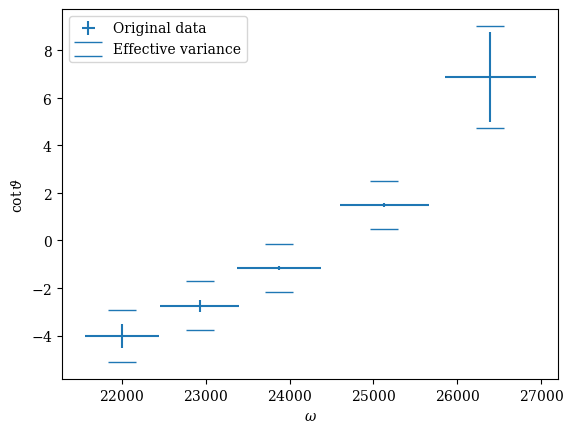

In [27]:
from matplotlib.pyplot import figure, errorbar, xlabel, ylabel, legend 

figure()
errorbar(omega,cott,dcott,domega,fmt='none',label='Original data')
errorbar(omega,cott,deff,fmt='none',capsize=10,
         elinewidth=.00001,label='Effective variance')
ylabel(r'$\cot\vartheta$')
xlabel(r'$\omega$')
legend();

Vi ser at usikkerhederne er væsentligt større.  Lad os lave vores kurvetilpasning med disse usikkerheder. 

We see that the uncertainties are significantly greater. Let's make our fit with these uncertainties.

In [28]:
p1, cov1 = curve_fit(nf,omega,cott,(1,1),deff,absolute_sigma=True)
chi21, nu = chi2nu(omega,cott,nf,p1,deff)
print('chi2/nu={:.1f}/{}={:.1f} ({:.1f}%)'
      .format(chi21,nu,chi21/nu, chi2.sf(chi21,nu)*100))
for pp, ee in zip(p1,sqrt(cov1.diagonal())):
    print_result(pp,ee)

chi2/nu=2.2/3=0.7 (52.8%)
  0.0010 +/-   0.0002
  600000 +/-   100000


Vi har nu noget nær en perfekt kurvetilpasning med $p=52.8\%$.  Lad os plotte vores resultater sammen for at se hvordan det ser ud 

We now have something near a perfect fit with $p=52.8\%$. Let's plot our results together to see how it looks

Kurvetilpasning hvor den afhængige variabels usikkerheder er udskiftet med den effektive varians efter én iteration.

Curve fitting where the dependencies of the dependent variable are replaced by the effective variance after a single iteration. 

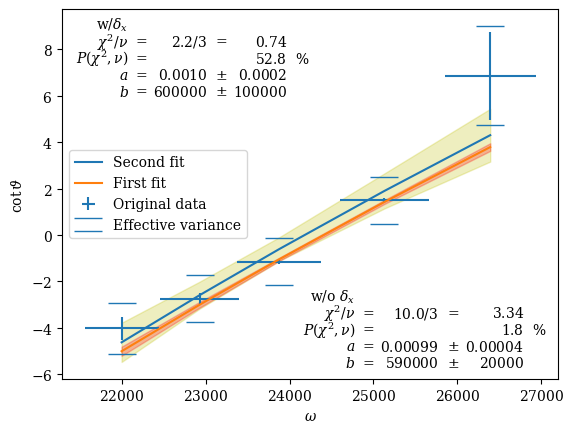

In [29]:
from matplotlib.pyplot import gca 

pnames=[r'a','b']

figure()
ax = gca()

ax.errorbar(omega,cott,dcott,domega,fmt='none',label='Original data')

plot_fit(omega,cott,deff,nf,p1,cov1,pnames=pnames,axes=ax,
        fit_kw={'label':'Second fit'},
        data_kw={'fmt':'none','elinewidth':0.000001,
                 'capsize':10,'label':'Effective variance'},
        band_kw={'color':'y','alpha':0.25},
        tbl_kw={'loc':'upper left','title':r'w/$\delta_x$'})

plot_fit(omega,cott,dcott,nf,p0,cov0,pnames=pnames,axes=ax,
        fit_kw={'label':'First fit'},
        data_kw={'fmt':'none','ecolor':'none'},
        band_kw={'color':'r','alpha':0.25},
        tbl_kw={'loc':'lower right','title':r'w/o $\delta_x$'})

ax.set_ylabel(r'$\cot\vartheta$')
ax.set_xlabel(r'$\omega$')
ax.legend(loc='center left');

Vi ser at vores anden kurvetilpasning beskriver vores data punkter langt bedre en den første.  Bemærk at parameterværdierne $a,b$ ikke har ændret sig synderligt, men at _usikkerhederne_ $\delta_a,\delta_b$ er cirka fem gange større. 

We see that our second curve fit describes our data points far better than the first one. Note that the parameter values $a,b$ have not changed significantly, but that the _uncertainties_ $\delta_a,\delta_b$ are about five times larger.

For at beregne $R$ og $L$, skal vi løse 

\begin{align*}
  a &= \frac{L}{R}\\
  b &= \frac{1}{RC}\\
\end{align*}

To calculate $R$ and $L$, we need to solve

\begin{align*}
  a &= \frac{L}{R}\\
  b &= \frac{1}{RC}\\
\end{align*}

In [30]:
L, R, C = symbols('L R C',real=True)
s       = solve([Eq(a,L/R), Eq(b,1/(R*C))],[R,L])
[display(Eq(k,v)) for k,v in s.items()];

Eq(L, a/(C*b))

Eq(R, 1/(C*b))

Vi vil igen bruge _SymPy_ `lambdify` til at lave disse om til numeriske udtryk som vi kan evaluerer og propagerer usikkerheder igennem 

We will again use _SymPy_ `lambdify` to convert these into numeric expressions into something which we can evaluate and propagate uncertainties through

In [31]:
nL = lambdify((a,b,C),s[L])
nR = lambdify((a,b,C),s[R])

Vi kan nu bruge disse til at beregne værdierne og usikkerhederne på $R$ og $L$.  Vi sætter $C=0.02\mu\mathrm{F}$, og bruger funktionen `propagate_uncertainty` 

We can now use these to calculate the values ​​and uncertainties of $R$ and $L$. We set $C=0.02\mu\mathrm{F}$, and use the function `propagate_uncertainty`

In [32]:
vC = 0.02e-6 
vL = nL(*p1,vC)
vR = nR(*p1,vC)

eL = sqrt(propagate_uncertainty(lambda p: nL(*p,vC),p1,cov1))
eR = sqrt(propagate_uncertainty(lambda p: nR(*p,vC),p1,cov1))

for v,e,n,u in zip([vL,vR],[eL,eR],['L','R'],['Henry','Ohm']):
    print(format_result(v,e,name=n,unit=u,latex=False,expo=None))

L=(0.086 +/- 0.002) Henry
R=(80 +/- 20) Ohm


## Generaliseret ikke-lineær mindste-kvadrat tilpasning

Vi kan generaliserer metoden oven over og implementere en erstatning for `scipy.optimize.curve_fit` som også kan  accepterer usikkerheder $\delta_x$ i den uafhængige variabel $x$.  Hvis brugeren _ikke_ giver $\delta_x$ falder vi tilbage til  `scipy.optimize.curve_fit`.  Vi vil også tillade at brugeren giver $\frac{\partial f}{\partial x}$ så at vi kan evaluerer den effektive varians direkte.  Bemærk også at vi typisk giver absolute usikkerheder på vores måle punkter, så med mindre brugeren giver et andet argument, vil vi give `abslute_sigma=True` til `scipy.optimize.curve_fit`. 

## Generalised non-linear least-squares fitting 

We can generalize the method above and implement a substitute for `scipy.optimize.curve _fit` which can also accept uncertainties $\delta_x$ in the independent variable $x$. If the user _does not_ provide $\delta_x$, we fall back to `scipy.optimize.curve_ fit`. We will also allow the user to provide $\frac{\partial f}{\partial x}$ so that we can evaluate the effective variance directly.  Note, since we often have absolute uncertainties on our measurements, we will pass `absolute_sigma=True` to `scipy.optimize.curve _fit`, unless the user overrides that.

In [33]:
def lsq_fit(f,x,y,p0,dy=None,dx=None,df=None,df_step=None,
           ftol=1.49012e-8,ptol=1.49012e-8,absolute_sigma=True,**kwargs):
    from scipy.optimize import curve_fit as  cfit 
    from scipy.misc import derivative as diff
    from numpy import gradient as grad 
    from numpy import sqrt, isclose, allclose, hstack, isscalar, atleast_1d
    from scipy.linalg import norm
    
    kwargs['xtol'] = ptol
    kwargs['ftol'] = ftol
    
    xx  = atleast_1d(x) 
    yy  = atleast_1d(y) 
    ddy = atleast_1d(dy) if dy is not None else None
    ddx = atleast_1d(dx) if dx is not None else None
    if ddy is not None:
        mask = dy != 0
        xx   = xx[mask]
        yy   = yy[mask]
        ddy  = ddy[mask]
        ddx  = ddx[mask] if ddx is not None else None
        
    r0 = cfit(f,xx,yy,p0,sigma=ddy,absolute_sigma=absolute_sigma,**kwargs)
    
    if ddx is None:
        return r0
    
    if df_step is not None and isinstance(df_step,str):
        if df_step != 'deltax':
            raise ValueError('Unknown step method: '+df_step)
        df_step = dx
    elif df_step is None:
        df_step = 1
        
    dds    = df_step
    rold   = r0
    fold,_ = chi2nu(xx,yy,f,rold[0],ddy)
    while True:
        pold, covold, *_ = rold
        eff    = sqrt(effective_variance(xx,ddx,f,pold,ddy,df,df_step))
        rnew   = cfit(f,xx,yy,p0,sigma=eff,absolute_sigma=absolute_sigma,**kwargs)
        fnew,_ = chi2nu(xx,yy,f,rnew[0],eff)
        
        if isclose(fnew,fold,rtol=ftol,atol=0):
            return rnew 
        
        dp  = rnew[0]-pold 
        ndp = norm(dp)
        np  = norm(pold)
        
        if ndp < (ptol * (ptol + np)):
            return rnew 
        
        rold = rnew 
        fold = fnew
        
curve_fit = lsq_fit
lsqfit = lsq_fit

Vi gentager vores kurvetilpasning fra ovenover med denne nye funktion. 

We repeat our fit from above with this new function.

Kurve tilpasning hvor usikkerheden i den afhængige variabel er udskiftet med kvadratrodden af den effiktive varians. 

Curve fitting where the uncertainty of the dependent variable is replaced by the square root of the effective variance.

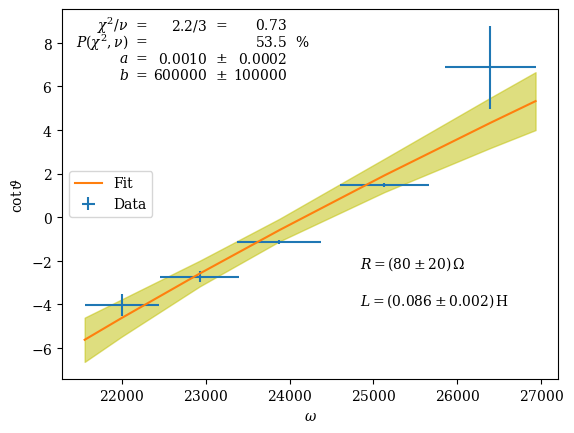

In [34]:
p, cov = lsq_fit(nf,omega,cott,(1,1),dcott,domega,absolute_sigma=True)

figure()
ax = gca()
plot_fit(omega,cott,dcott,nf,p,cov,domega,pnames=pnames,
        fit_kw={'label':'Fit','color':'tab:orange'},
        tbl_kw={'loc':'upper left'},
        leg_kw={'loc':'lower right'},
        data_kw={'fmt':'none','label':'Data'})

ax.set_ylabel(r'$\cot\vartheta$')
ax.set_xlabel(r'$\omega$')
ax.legend(loc='center left')
eL = sqrt(propagate_uncertainty(lambda p: nL(*p,vC),p,cov))
eR = sqrt(propagate_uncertainty(lambda p: nR(*p,vC),p,cov))
y  = .2
for v,e,n,u in zip([vL,vR],[eL,eR],['L','R'],[r'\mathrm{H}',r'\Omega']):
    ax.text(.6,y,'$'+format_result(v,[e],name=n,unit=u,expo=None)+'$',
            transform=ax.transAxes)
    y += .1

In [35]:
lsq_fit.__doc__=\
    """Perform a non-linear least squares fit of f to data
    
    Note, if dy is given, then any element for which dy is zero 
    are filtered out of the fit (does not make sense to include,
    since the scaled residual would be infinite)
    
    Parameters
    ----------
    f : callable 
        The model to fit with the signature `f(x,...)`
    x : array-like shape=(M) or (k,M)
        Independent variable values or predictors and variable values
    y : array-like shape=(M)
        Dependent variable values 
    p0 : array-like shape=(N)
        Initial guess of parameter values 
    dy : array-like shape=(M) or shape=(M,M)
        Uncertainties in `y` or covariance matrix of uncertainties in `y`
    dx : array-like shape=(M), or None
        Uncertainties in `x`.  If specified, we will employ an 
        iterative procedure using the *effective variance* method 
        to include these uncertainties in the fit. 
    df : callable, or None 
        If `dx` is given, then this argument is supposed to 
        calculate the derivative of f with respect to x.  This 
        will then be evaluated at all `x` for the current 
        parameter values. 
    dx_step : scalar, array, string, or None 
        If given, the step size to use when calculating the derivative
        of f with respect to x for calculating the effective variance 
        (in case dx was given).   If the value is the string 'deltax', then
        use dx for the step size.  If None, use 1 as the step size.  If df 
        is given, then this is not used. 
    ftol : float, optional 
        Tolerance criteria for terminating iterative procedure. 
        If the change in the chi-square (dchi2) fulfills 
        
            dchi2 < ftol * chi2
          
        then the procedure is stopped.  This is also passed on to 
        `scipy.optimize.curve_fit` 
    ptol : float, optional 
        Tolerance criteria for terminating iterative procedure. 
        If the change in the parameter values (dp) fulfills 
        
            abs(dp) < ptol * (ptol + abs(p))
            
        then the procedure is stopped. This is also passed on to 
        `scipy.optimize.curve_fit` as the parameter `xtol`. 
    **kwargs : dict 
        Additional arguments passed to `scipy.optimize.curve_fit`
        
    Returns 
    -------
    p : array-like shape=(N) 
        Best estimate of parameter values 
    cov : array-like, shape=(N,N)
        Covariance matrix of parameters 
        
    See also
    --------
    fit, chi2nu, plot_fit, plot_fit_table, plot_fit_func
    """
